### Spatial transcriptomics of fixed tissue micro-regions using Pick-Seq

Spatial transcriptomics and multiplexed imaging are complementary methods for studying tissue biology. Here we describe a simple method for transcriptional profiling of formalin fixed histology specimens based on mechanical isolation of tissue micro-regions containing 5-20 cells. Sequencing micro-regions from an archival melanoma specimen having multiple distinct histologies reveals significant differences in transcriptional programs associated with tumor invasion, proliferation, and immunoediting and parallel imaging confirms changes in immuno-phenotypes and cancer cell states.

Sept 25 2020

In [9]:
# Load necessary packages
library(arseq)
library(ggplot2)
library(wesanderson)
library(clusterProfiler)
library(VennDiagram)
library(ggpmisc)

In [10]:
# Set working directory
setwd("/Users/aj/Dropbox (Partners HealthCare)/Data/melanoma_rarecyte/Figures for manuscript/data")

In [11]:
# Load Data- tonsil
tonsil_data <- read.csv(file= "tonsil/tonsil_counts.csv", row.names = 1, header = T)
tonsil_meta <- read.csv(file= "tonsil/tonsil_meta.csv", row.names = 1, header = T)
tonsil_ndata <- read.csv(file= "tonsil/ARSeq/normalized_data_stable.csv", row.names = 1, header = T)

In [12]:
# Load Data- breast
breast_data <- read.csv(file= "breast/breast_counts.csv", row.names = 1, header = T)
breast_meta <- read.csv(file= "breast/breast_meta.csv", row.names = 1, header = T)
breast_ndata <- read.csv(file= "breast/ARSeq/normalized_data_stable.csv", row.names = 1, header = T)

In [13]:
# Load Data- melanoma
melanoma_data <- read.csv(file= "melanoma/melanoma_counts.csv", row.names = 1, header = T)
melanoma_meta <- read.csv(file= "melanoma/melanoma_meta.csv", row.names = 1, header = T)
melanoma_ndata <- read.csv(file= "melanoma/ARSeq/normalized_data_stable.csv", row.names = 1, header = T)

In [14]:
# Load Data- GeoMx
geomx_data <- read.csv(file= "geomx/geomx_counts.csv", row.names = 1, header = T)
geomx_data <- round(geomx_data,0)
geomx_meta <- read.csv(file= "geomx/geomx_meta.csv", row.names = 1, header = T)
geomx_ndata <- read.csv(file= "geomx/ARSeq/normalized_data_stable.csv", row.names = 1, header = T)

In [15]:
# For Technical reproducibility
combined_data <- read.csv(file= "reproducability/combined_data.csv", row.names = 1, header = T)
combined_meta <- read.csv(file= "reproducability/combined_meta.csv", row.names = 1, header = T)
combined_ndata <- read.csv(file= "reproducability/ARSeq/normalized_data_stable.csv", row.names = 1, header = T)

In [16]:
# Custom Signature for GSEA
custom_sig <- read.csv(file= "/Users/aj/Dropbox (Partners HealthCare)/Data/covid19/signatures/all_sig.csv", row.names=1, header = F)
custom_sig <- data.frame(t(custom_sig))

In [ ]:
# ARSeq analysis to generate normalized data
dds = arseq (tonsil_data, tonsil_meta, design = "cells", dgea=F, contrast = list(A = c("B-cell follice"), B= c("T-cell zone")), custom.gsea = custom_sig)
dds = arseq (breast_data, breast_meta, design = "region", dgea=F, contrast = list(A = c("T-cell"), B= c("Tumor")), custom.gsea = custom_sig)
dds = arseq (melanoma_data, melanoma_meta, design = "group", dgea=F, contrast = list(A = c("Melanoma in situ"), B= c("Exophytic Melanoma")), custom.gsea = custom_sig)
dds = arseq (geomx_data, geomx_meta, design = "group", contrast = list(A = c("Melanoma in situ"), B= c("Exophytic Melanoma")), custom.gsea = custom_sig)
dds = arseq (combined_data, combined_meta, design = "experiment", contrast = list(A = c("Experiment 1"), B= c("Experiment 2")), custom.gsea = NULL)

#### Number of genes detected

In [17]:
e <- tonsil_ndata
m <- tonsil_meta
combined_detected = c()
for (i in 1:ncol(e)){
  pick = e[,i]
  genes_detected = length(pick[pick>2])
  combined_detected = c(combined_detected,genes_detected)
}

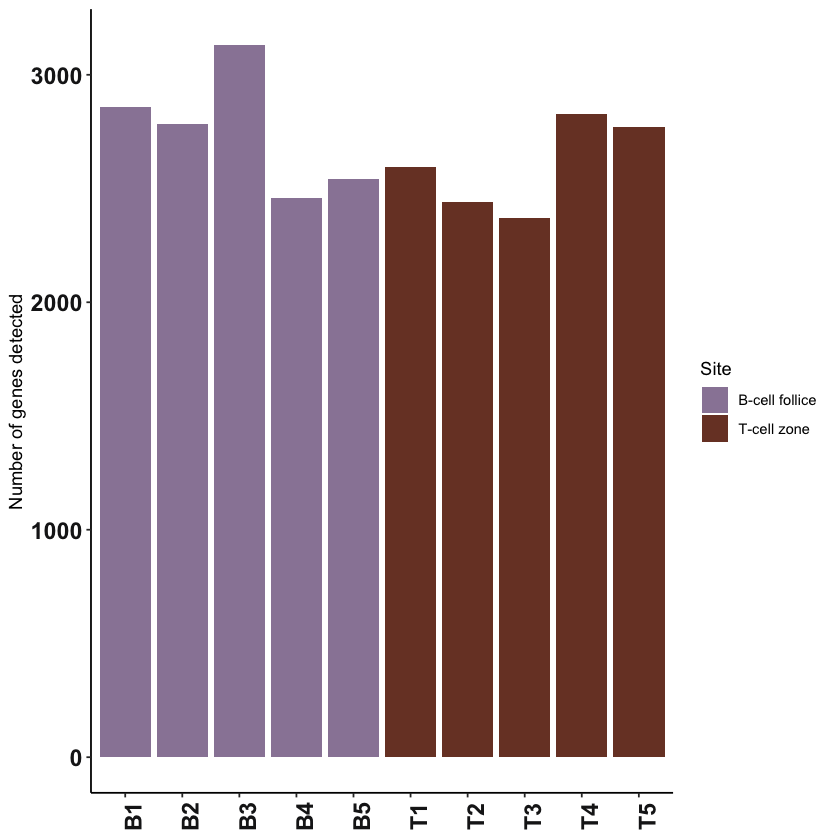

In [18]:
g = data.frame(combined_detected, row.names = colnames(e))
g = merge(g,m, by="row.names")
g$Row.names  <- factor(g$Row.names , levels = g$Row.names)

ggplot(data=g, aes(x=Row.names, y=combined_detected,fill=cells)) + geom_bar(stat="identity")+
  theme_classic()+ scale_fill_manual(values=wes_palette(n= length(unique(g$cells)), name="IsleofDogs1"))+
  labs(fill = "Site") +
  theme(plot.title = element_text(hjust = 0.5),axis.title.x = element_blank(),
        axis.text.x = element_text(face="bold", color="#1a1a1b", 
                                   size=14,angle = 90),
        axis.text.y = element_text(face="bold", color="#1a1a1b", 
                                   size=14))+ 
  labs(y='Number of genes detected')

#### PCA of tonsil picks

In [ ]:
setwd("/Users/aj/Dropbox (Partners HealthCare)/Data/melanoma_rarecyte/Figures for manuscript/data/tonsil/")
dds = arseq (data = tonsil_data, meta = tonsil_meta, design = "region", qc=F, dgea=T, contrast = list(A = c("B-cell follice A"), B= c("B-cell follice B")))
arseq.pca.plot (dds,wes_palette='IsleofDogs1')

#### # Bar plot of genes that are different between the two follicles JCHAIN, MZB1 and CD21

Using region as id variables



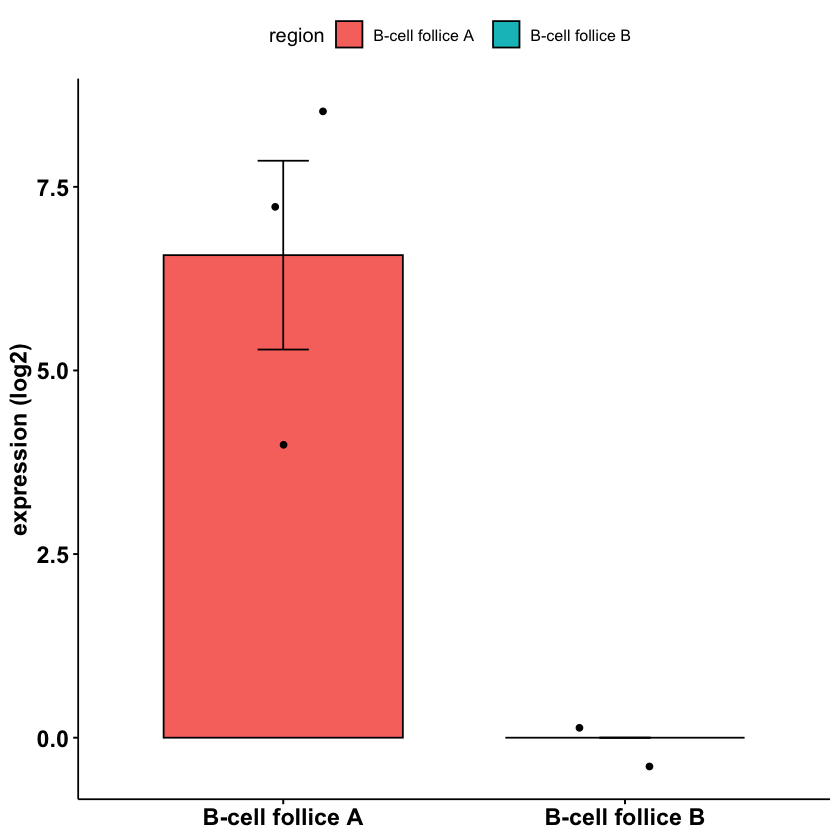

In [21]:
goi_collapsed_jitter (tonsil_ndata, tonsil_meta, goi='JCHAIN',  groups=c("B-cell follice A","B-cell follice B") , intgroup='region')

Using region as id variables



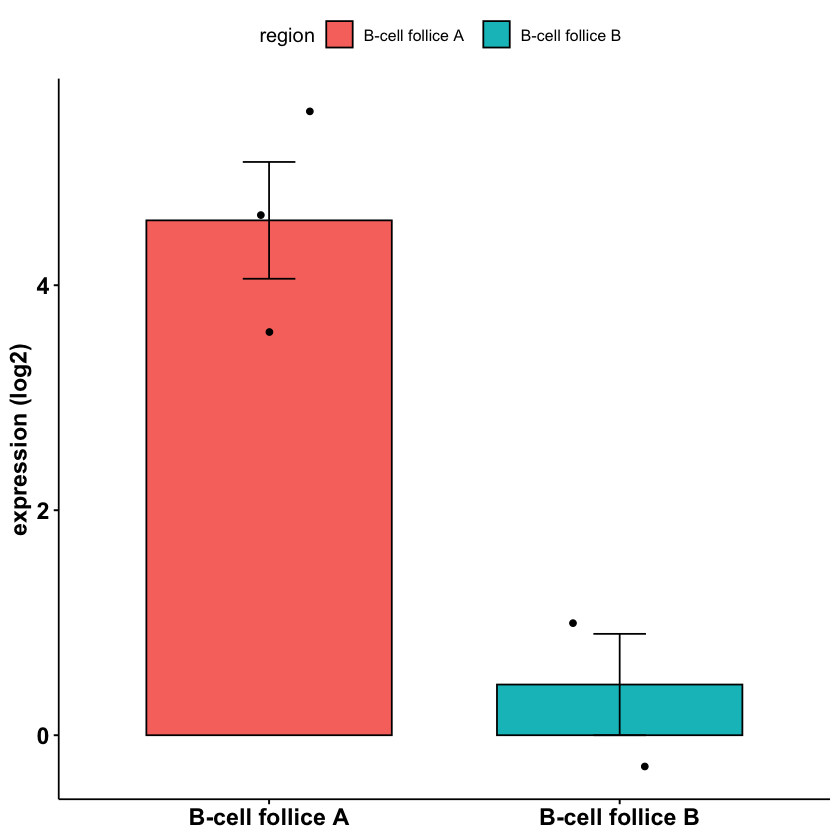

In [22]:
goi_collapsed_jitter (tonsil_ndata, tonsil_meta, goi='MZB1',  groups=c("B-cell follice A","B-cell follice B") , intgroup='region')

Using region as id variables



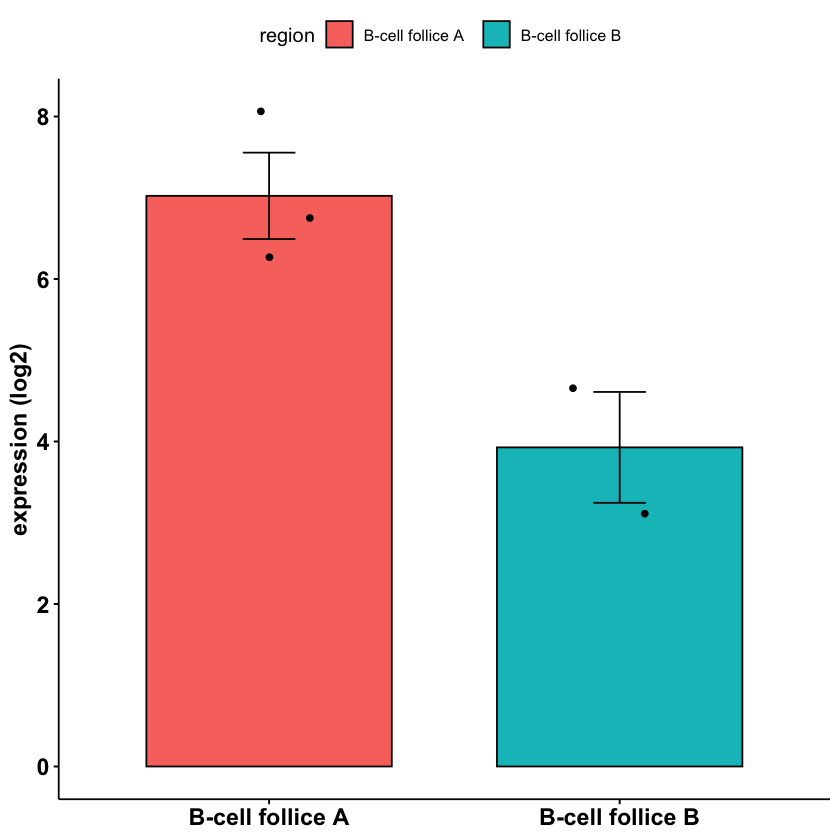

In [23]:
goi_collapsed_jitter (tonsil_ndata, tonsil_meta, goi='CR2',  groups=c("B-cell follice A","B-cell follice B") , intgroup='region')

#### Breast cancer number of genes detected

In [24]:
 setwd("/Users/aj/Dropbox (Partners HealthCare)/Data/melanoma_rarecyte/Figures for manuscript/data/breast/")

e <- breast_ndata
m <- breast_meta

combined_detected = c()
for (i in 1:ncol(e)){
  pick = e[,i]
  genes_detected = length(pick[pick>2])
  combined_detected = c(combined_detected,genes_detected)
}


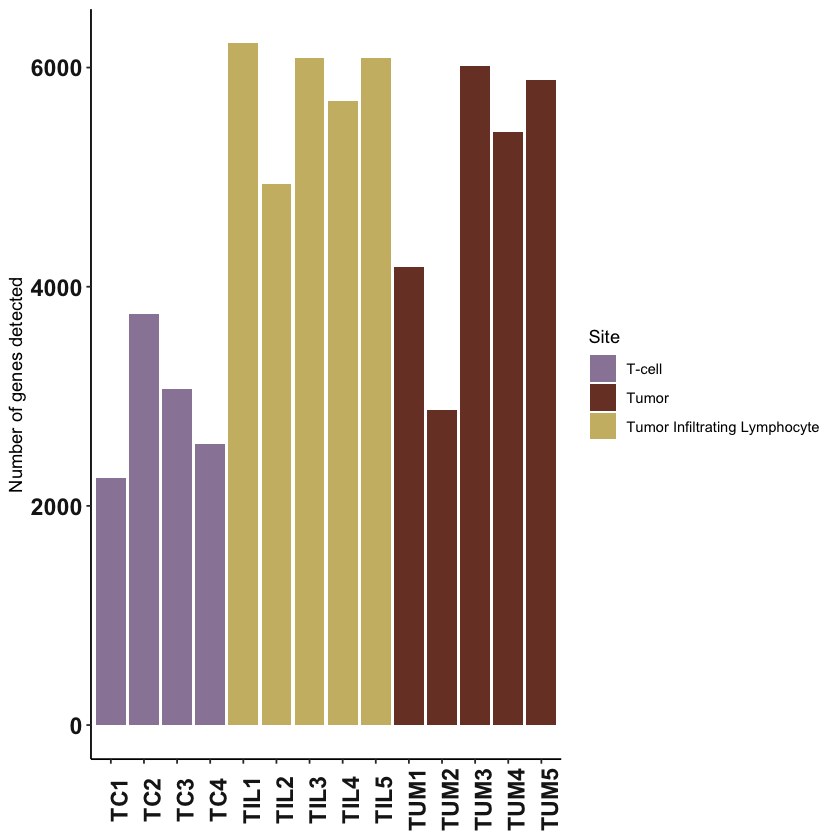

In [25]:
g = data.frame(combined_detected, row.names = colnames(e))
g = merge(g,m, by="row.names")
g$Row.names  <- factor(g$Row.names , levels = g$Row.names)

ggplot(data=g, aes(x=Row.names, y=combined_detected,fill=region)) + geom_bar(stat="identity")+
  theme_classic()+ scale_fill_manual(values=wes_palette(n= length(unique(g$region)), name="IsleofDogs1"))+
  labs(fill = "Site") +
  theme(plot.title = element_text(hjust = 0.5),axis.title.x = element_blank(),
        axis.text.x = element_text(face="bold", color="#1a1a1b", 
                                   size=14,angle = 90),
        axis.text.y = element_text(face="bold", color="#1a1a1b", 
                                   size=14))+ 
  labs(y='Number of genes detected')


#### ssGSEA analysis of breast realted signatures

In [28]:
breast_sig <- read.csv(file= "breast_cancer_sigs.csv", row.names=1, header = F, check.names = F)
ssgsea_analysis (data = breast_ndata, signature=breast_sig, meta=breast_meta, intgroup='region', show_column_names=T,  padding = unit(c(2, 2, 2, 40), "mm"))

Estimating ssGSEA scores for 11 gene sets.
  |                                                                      |   0%Using parallel with 4 cores
  |======================================================================| 100%


#### Gene of interest plots ESR1 PGR & ANXA1 

Using region as id variables



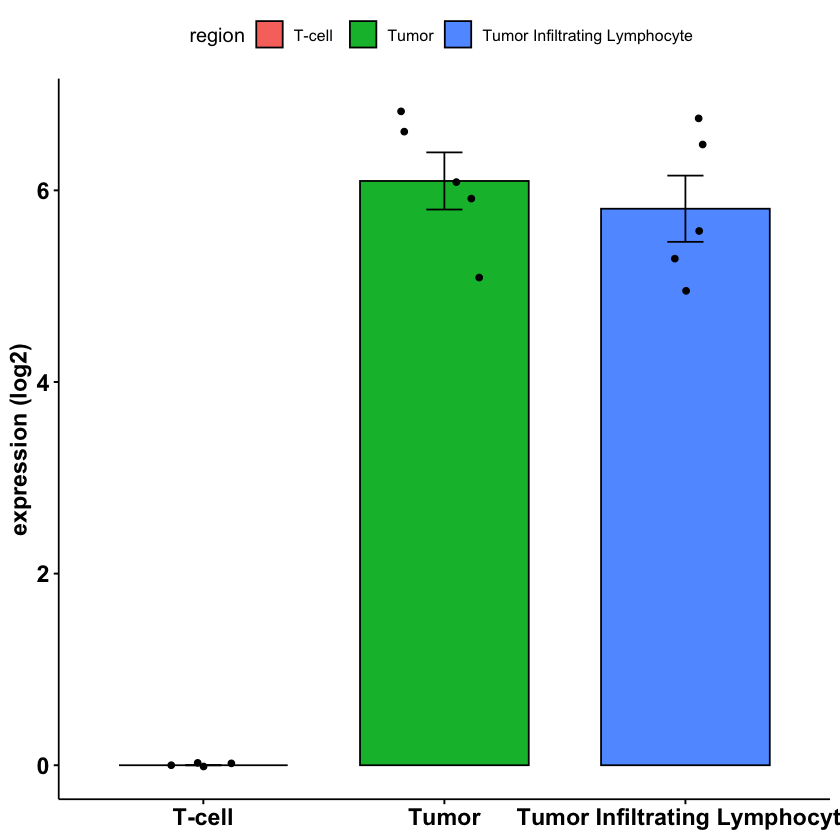

In [31]:
goi_collapsed_jitter (breast_ndata, breast_meta, goi='ESR1', intgroup='region')

Using region as id variables



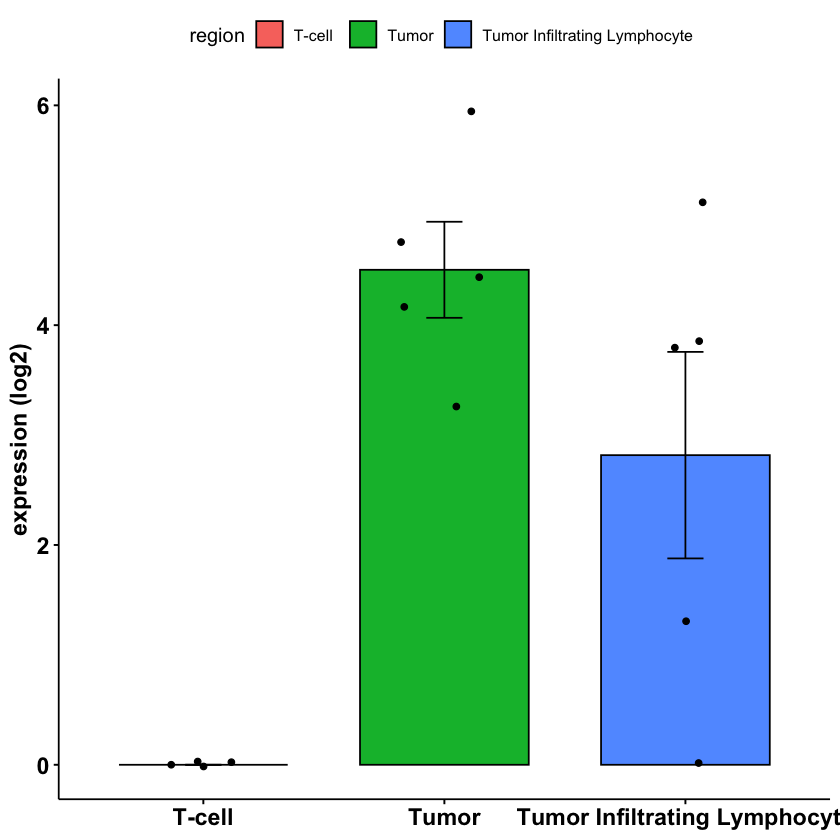

In [32]:
goi_collapsed_jitter (breast_ndata, breast_meta, goi='PGR', intgroup='region')

Using region as id variables



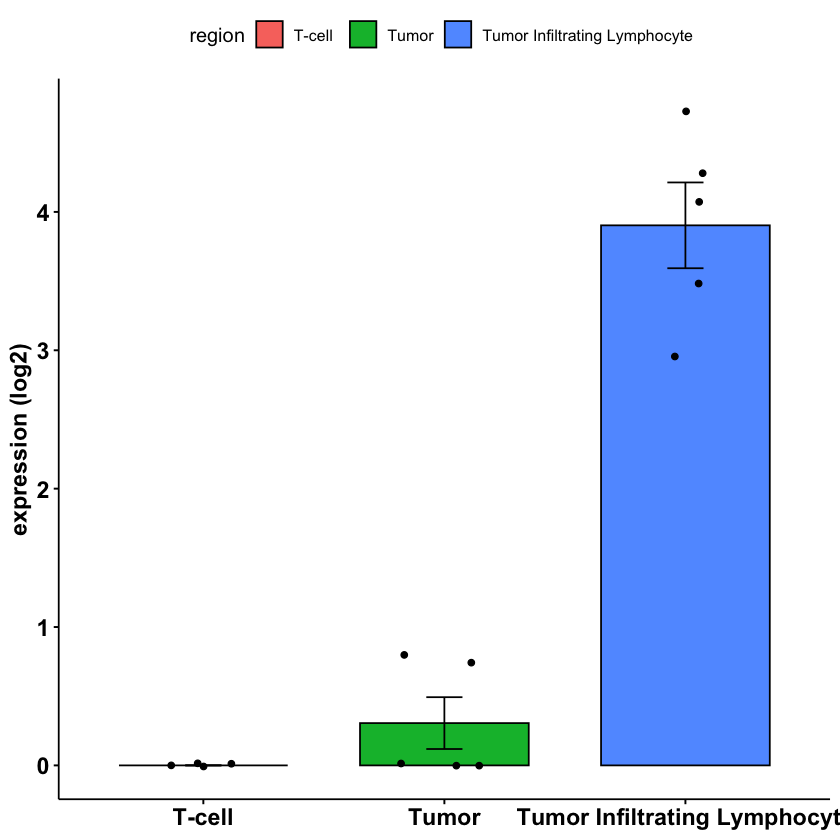

In [33]:
goi_collapsed_jitter (breast_ndata, breast_meta, goi='ANXA1', intgroup='region')

#### Number of genes detected in melanoma samples

In [34]:
setwd("/Users/aj/Dropbox (Partners HealthCare)/Data/melanoma_rarecyte/Figures for manuscript/data/melanoma/")
e <- melanoma_ndata
m <- melanoma_meta
combined_detected = c()
for (i in 1:ncol(e)){
  pick = e[,i]
  genes_detected = length(pick[pick>2])
  combined_detected = c(combined_detected,genes_detected)
}

Warning message:
“Use of `g$group_overall` is discouraged. Use `group_overall` instead.”
Warning message:
“Use of `g$group_overall` is discouraged. Use `group_overall` instead.”
Warning message:
“Use of `g$combined_detected` is discouraged. Use `combined_detected` instead.”
Warning message:
“Use of `g$group_overall` is discouraged. Use `group_overall` instead.”
Warning message:
“Use of `g$combined_detected` is discouraged. Use `combined_detected` instead.”


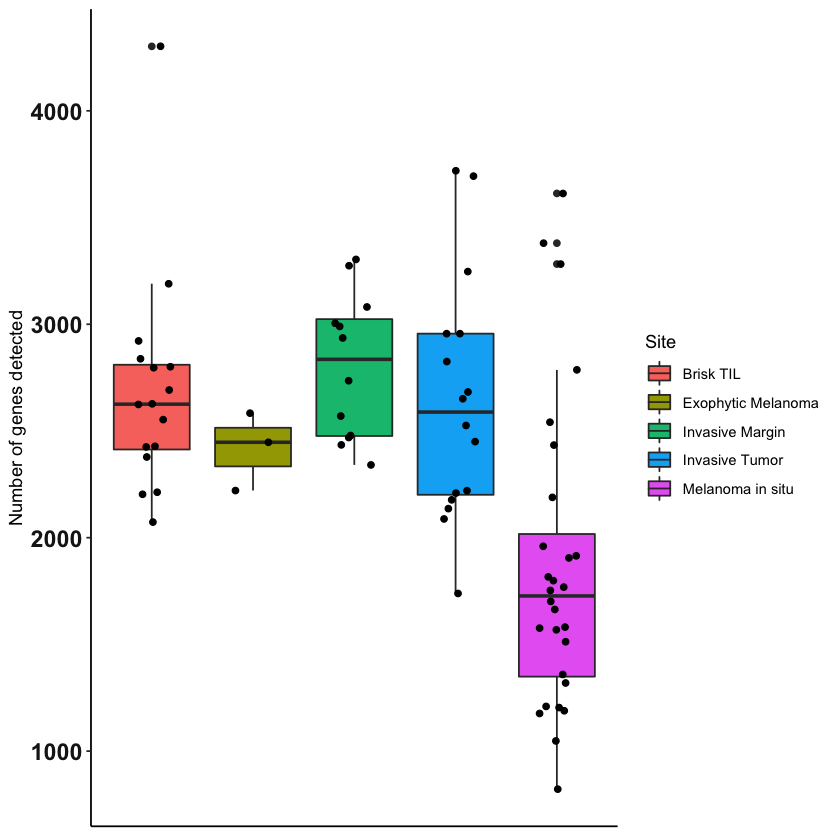

In [36]:
g = data.frame(combined_detected, row.names = colnames(e))
g = merge(g,m, by="row.names")
g$Row.names  <- factor(g$Row.names , levels = g$Row.names)

ggplot(g, aes(g$group_overall, g$combined_detected)) + geom_boxplot(aes(fill = g$group_overall)) + 
  geom_jitter(width = 0.2)+
  theme_classic()+
  theme(plot.title = element_text(hjust = 0.5),axis.title.x = element_blank(),
        axis.text.y = element_text(face="bold", color="#1a1a1b", size=14))+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
  labs(y='Number of genes detected')+
  labs(fill = "Site") 

#### PCA of the melanoma picks

In [ ]:
setwd("/Users/aj/Dropbox (Partners HealthCare)/Data/melanoma_rarecyte/Figures for manuscript/data/melanoma/")
dds = arseq (data = melanoma_data, meta = melanoma_meta, design = "group", qc=F, dgea=F, contrast = list(A = c("Melanoma in situ"), B= c("Invasive Tumor")))

[1] "Performing PCA analysis"


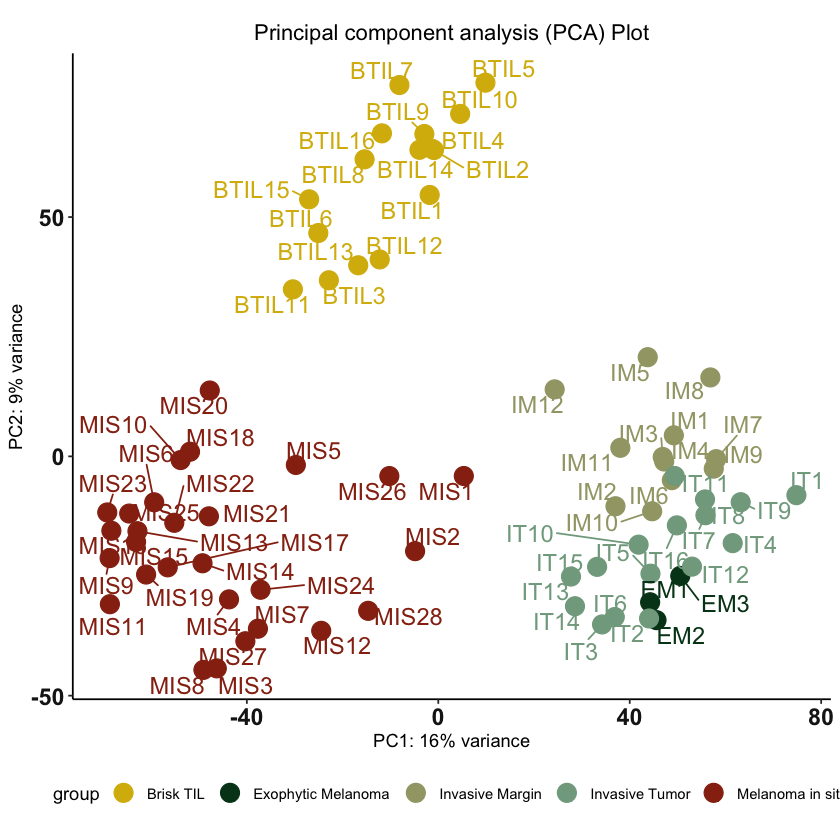

In [87]:
arseq.pca.plot (dds, intgroup='group_overall',wes_palette='Cavalcanti1')

#### Volcano plot between MIS and Tumor

In [ ]:
# Volcano plot between MIS and Tumor
setwd("/Users/aj/Dropbox (Partners HealthCare)/Data/melanoma_rarecyte/Figures for manuscript/data/melanoma/")
dds = arseq (data = melanoma_data, meta = melanoma_meta, design = "group_minimal", qc=F, dgea=T, contrast = list(A = c("Tumor"), B= c("Melanoma in situ")))
# load the DEG's for volcano plot 10X7

[1] "Generating a volcano plot between the constrast groups"


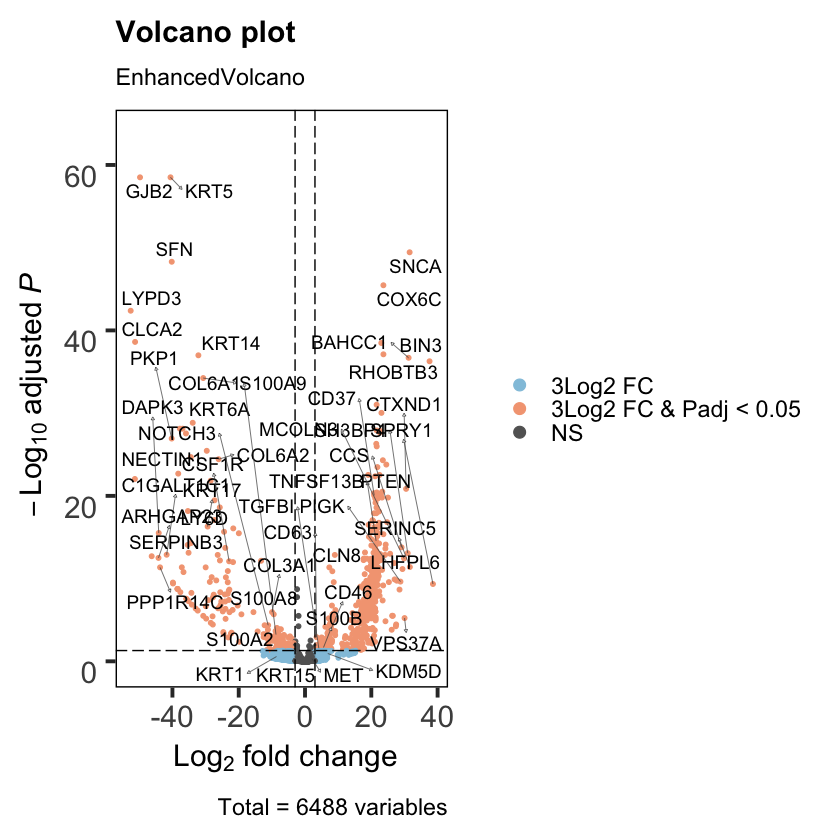

In [39]:
deg <- read.csv(file= "ARSeq/Tumor vs Melanoma in situ/Differential expression/Tumor vs Melanoma in situ.csv", row.names = 1, header = T)

deg.volcano <- data.frame(deg)[complete.cases(data.frame(deg)),]
keyvals <- ifelse(deg.volcano$log2FoldChange < -3 & deg.volcano$padj < 0.05, '#f4a582', 
                  ifelse(deg.volcano$log2FoldChange > 3  & deg.volcano$padj < 0.05, '#f4a582',
                         ifelse(deg.volcano$log2FoldChange < -3  & deg.volcano$padj > 0.05, '#92c5de',
                                ifelse(deg.volcano$log2FoldChange > 3  & deg.volcano$padj > 0.05, '#92c5de','#636363'))))
keyvals[is.na(keyvals)] <- '#636363'
names(keyvals)[keyvals == '#f4a582'] <- '3Log2 FC & Padj < 0.05'
names(keyvals)[keyvals == '#92c5de'] <- '3Log2 FC'
names(keyvals)[keyvals == '#636363'] <- 'NS'

selectLab = c('KRT1','KRT15','KRT14','KRT17','KRT6A','LYPD3','NECTIN1','CLCA2','GJB2','SERPINB3','ARHGAP23','DAPK3','PPP1R14C','C1GALT1C1','KRT5','PKP1','SFN',
              'PIGK','CCS','LHFPL6','MCOLN3','VPS37A','CTXND1','SH3BP4','BAHCC1','SNCA','SERINC5','BIN3','SPRY1',
              'CLN8','LY6D','MET','CD63','KDM5D','IL17RA','NOTCH1','MAP3K7CL','S100B','NOTCH3','TGFBI',
              'S100A2','S100A8','S100A9','COL3A1','COL6A1','COL6A2','CD46','CSF1R','TNFSF13B','RHOBTB3',
              'COX6C','PTEN','CD37')

arseq.volcano.plot(deg,selectLab=selectLab)

#### Gene of interst plots KRT14 KRT1 S100B CD63

Using group_overall as id variables



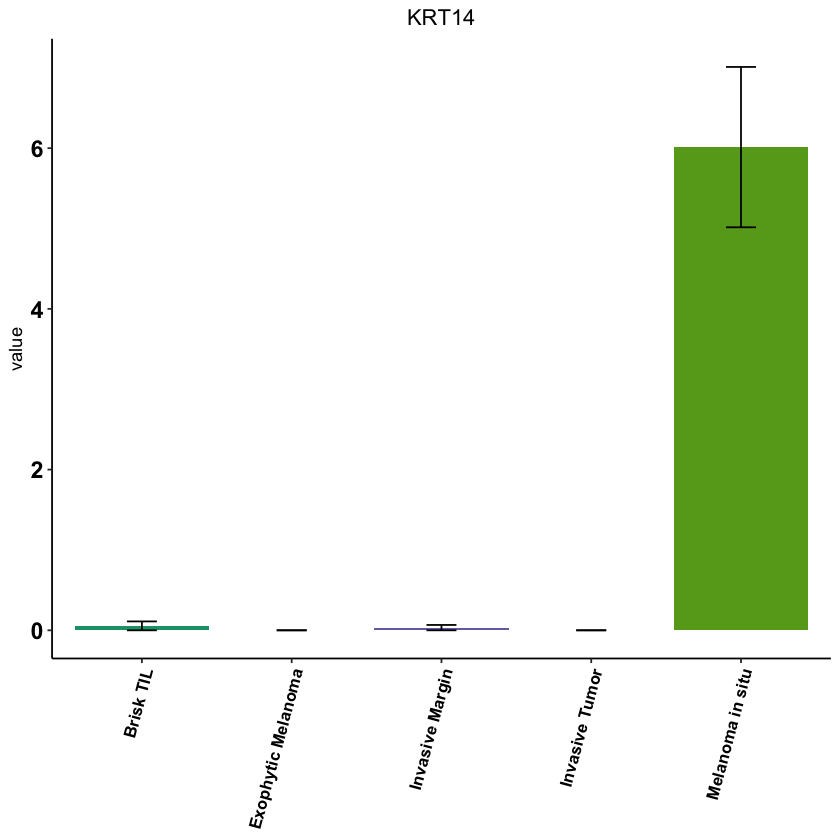

In [48]:
goi_collapsed (melanoma_ndata, melanoma_meta, goi='KRT14', intgroup='group_overall')

Using group_overall as id variables



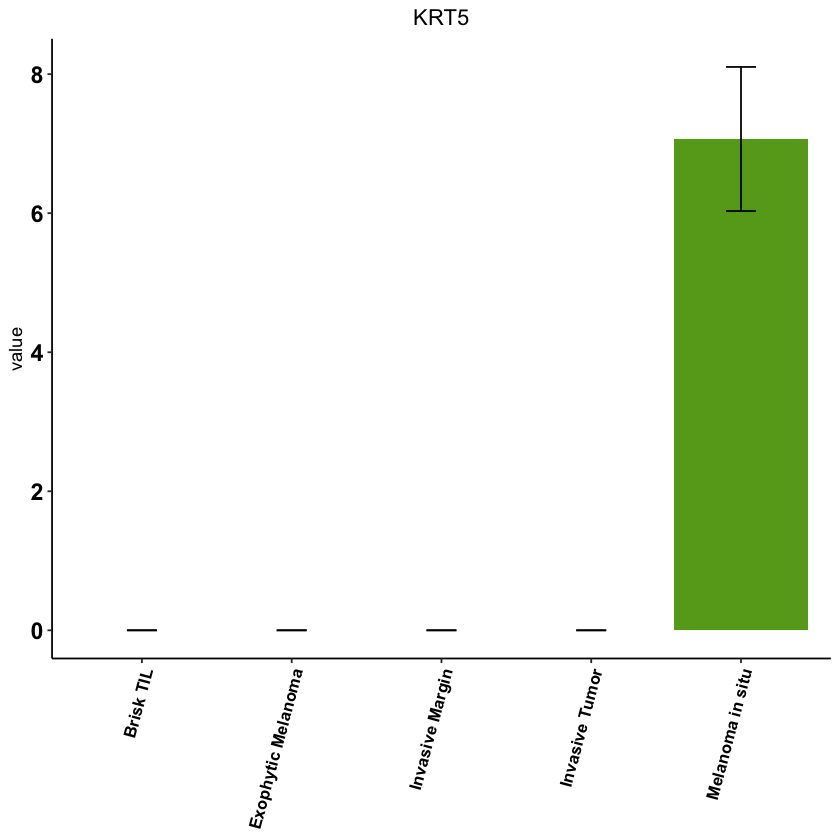

In [50]:
goi_collapsed (melanoma_ndata, melanoma_meta, goi='KRT5', intgroup='group_overall')

Using group_overall as id variables



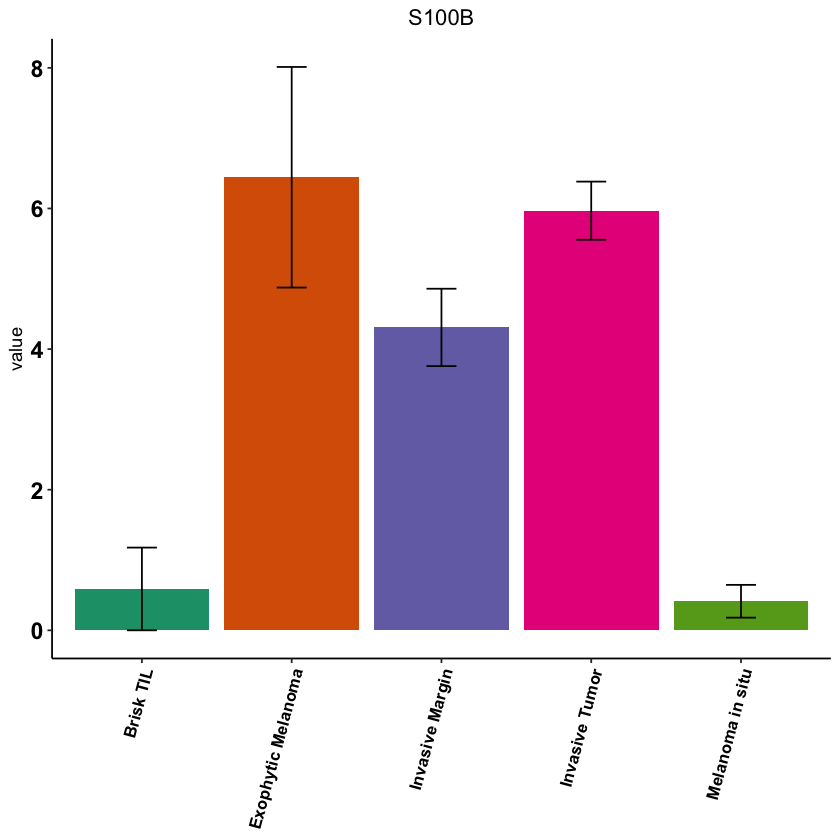

In [51]:
goi_collapsed (melanoma_ndata, melanoma_meta, goi='S100B', intgroup='group_overall')

Using group_overall as id variables



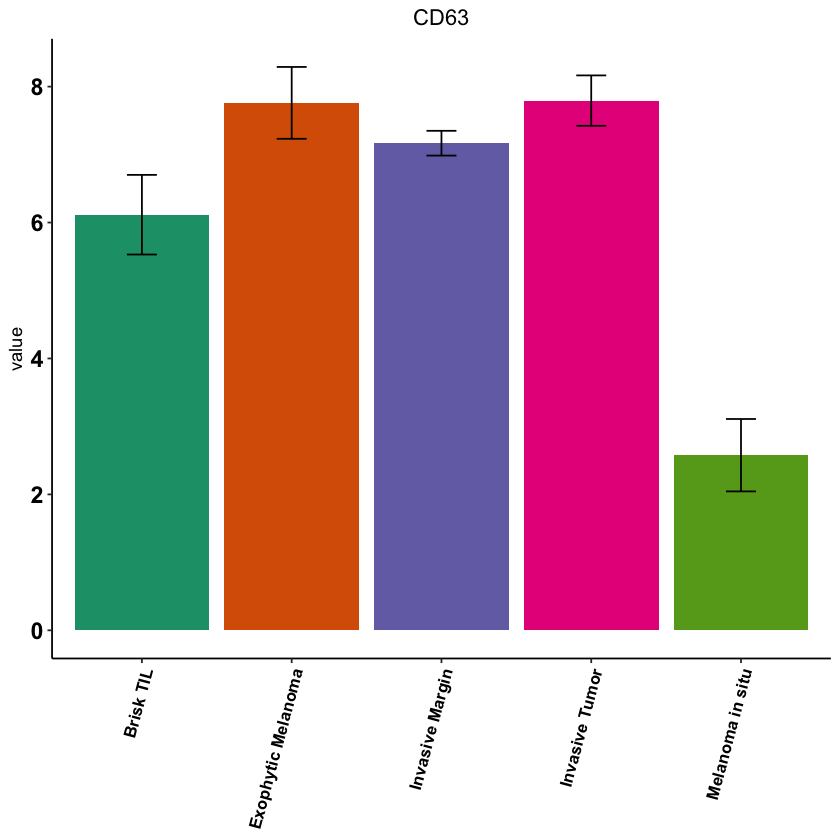

In [52]:
goi_collapsed (melanoma_ndata, melanoma_meta, goi='CD63', intgroup='group_overall')


#### Regulation of MITF and AXL programs in the tumor vs MIS regions

In [53]:
h  <- read.csv(file= "axl_mitf_signature.csv", header=F, row.names = 1)
h <- data.frame(t(h))
hh <- NA
for (i in 1: ncol(h)){
  print(i)
  tmp <- h[,i,drop=F]
  tmp <- tmp[!apply(is.na(tmp) | tmp == "", 1, all),,drop=F]
  colnames(tmp) <- c("gene")
  tmp$ont <- names(h[i])
  hh <- rbind(hh, tmp)
}
hh <- hh[-1,]
h <- hh[,c(2,1)]

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'axl_mitf_signature.csv'”


[1] 1
[1] 2


In [54]:
arseq.gsea.preprocess <- function(deg){
  # Create a ranked list of genes from deg
  ranked_list <- data.frame(deg[!is.na(deg$padj),])
  ranked_list$score <- -log(ranked_list$padj)*sign(ranked_list$log2FoldChange)
  ranked_list <- ranked_list[order(-ranked_list$score),]
  r_list <- ranked_list$score
  names(r_list) <- row.names(ranked_list)
  # Remove any infinity values
  ranked.list = r_list[is.finite(r_list)]
  return(ranked.list)
}

In [55]:
deg <- read.csv(file= "ARSeq/Exophytic Melanoma vs Melanoma in situ_A/Differential expression/Exophytic Melanoma vs Melanoma in situ.csv", row.names = 1, header = T)
ranked_deg <- arseq.gsea.preprocess(deg)

In [60]:
egmt2 <- GSEA(ranked_deg, TERM2GENE=h, verbose=FALSE,pvalueCutoff = 0.05)

Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“There are ties in the preranked stats (21.79% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


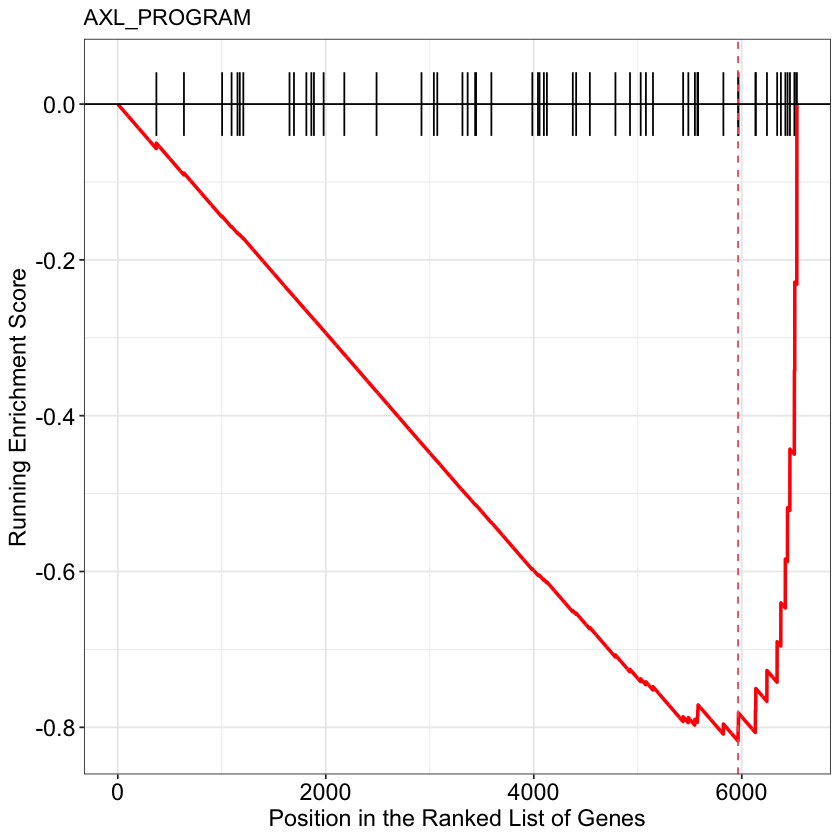

In [61]:
geneset =1 # 5x5
gseaplot(egmt2, geneSetID = geneset, by = "runningScore", color ="#000000", color.line = "red", title=egmt2$ID[geneset])

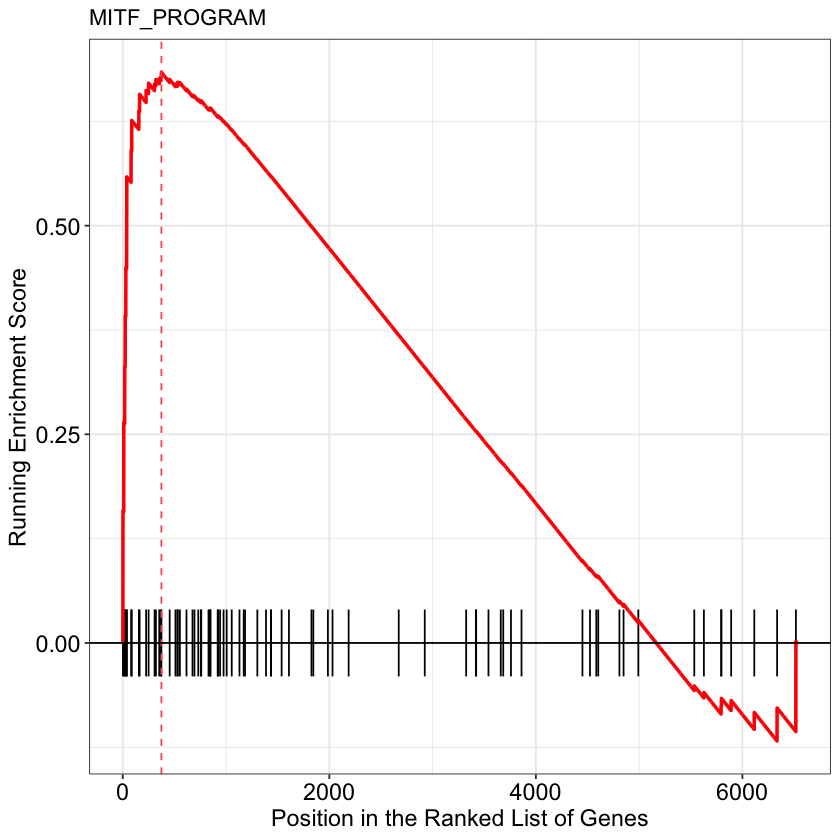

In [62]:
geneset =2 # 5x5
gseaplot(egmt2, geneSetID = geneset, by = "runningScore", color ="#000000", color.line = "red", title=egmt2$ID[geneset])

#### Gene of interest plot of downstream MITF targets

Using grouping as id variables



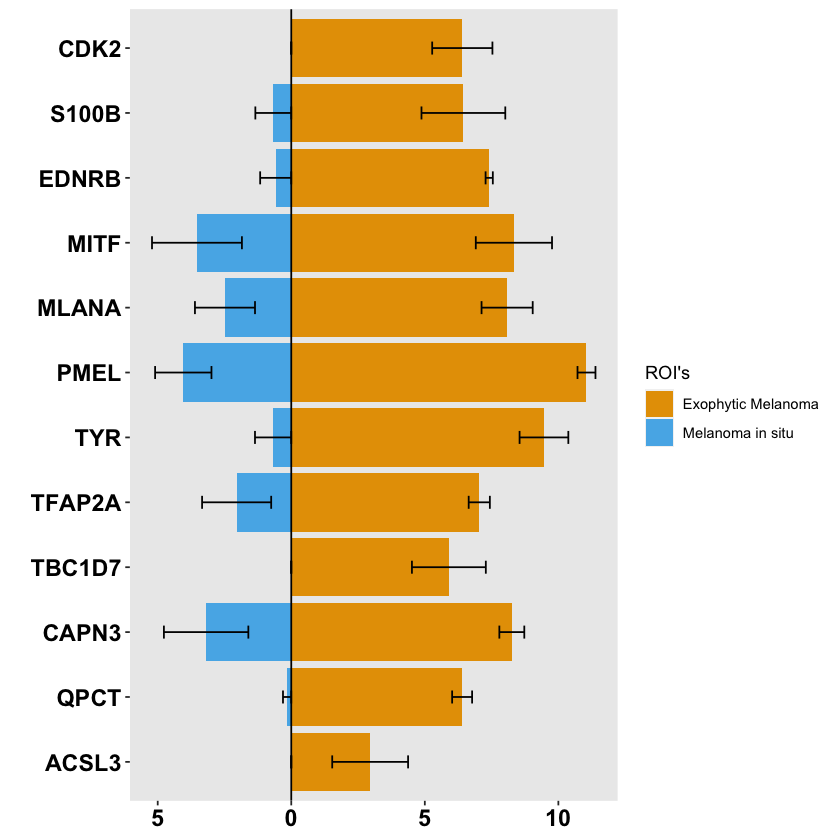

In [63]:
goi <- c('ACSL3','QPCT','CAPN3','TBC1D7','TFAP2A','TYR','PMEL','MLANA','MITF','EDNRB','S100B','CDK2')
groups <- list(A = c("Exophytic Melanoma"), B= c("Melanoma in situ"))
average_goi_plot (data=melanoma_ndata,meta=melanoma_meta,goi,intgroup='group',groups) #group_minimal

#### ssGSEA analysis of immune cells in melanoma morphological sites.

In [64]:
immune_sig <- read.csv(file= "immune_signatures.csv", row.names=1, header = F, check.names = F)
ssgsea_analysis (data = melanoma_ndata, signature=immune_sig, meta=melanoma_meta, intgroup='group_overall', show_column_names=F,  padding = unit(c(2, 2, 2, 35), "mm"))

Estimating ssGSEA scores for 31 gene sets.
  |                                                                      |   0%Using parallel with 4 cores
  |======================================================================| 100%


#### Technical reproducability

In [ ]:
setwd("/Users/aj/Dropbox (Partners HealthCare)/Data/melanoma_rarecyte/Figures for manuscript/data/reproducability/")
dds = arseq (combined_data, combined_meta, design = "experiment", contrast = list(A = c("Experiment 1"), B= c("Experiment 2")), custom.gsea = NULL)

[1] "Performing PCA analysis"


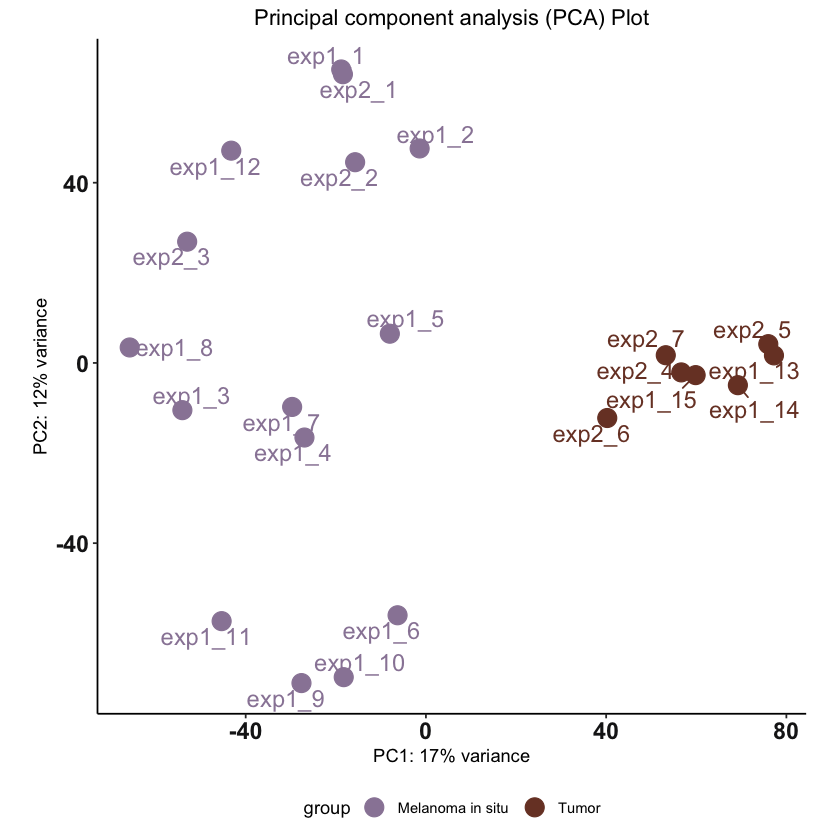

In [66]:
arseq.pca.plot (dds,wes_palette='IsleofDogs1',intgroup='region')

#### Check previously identified genes for reproducability

Using group as id variables



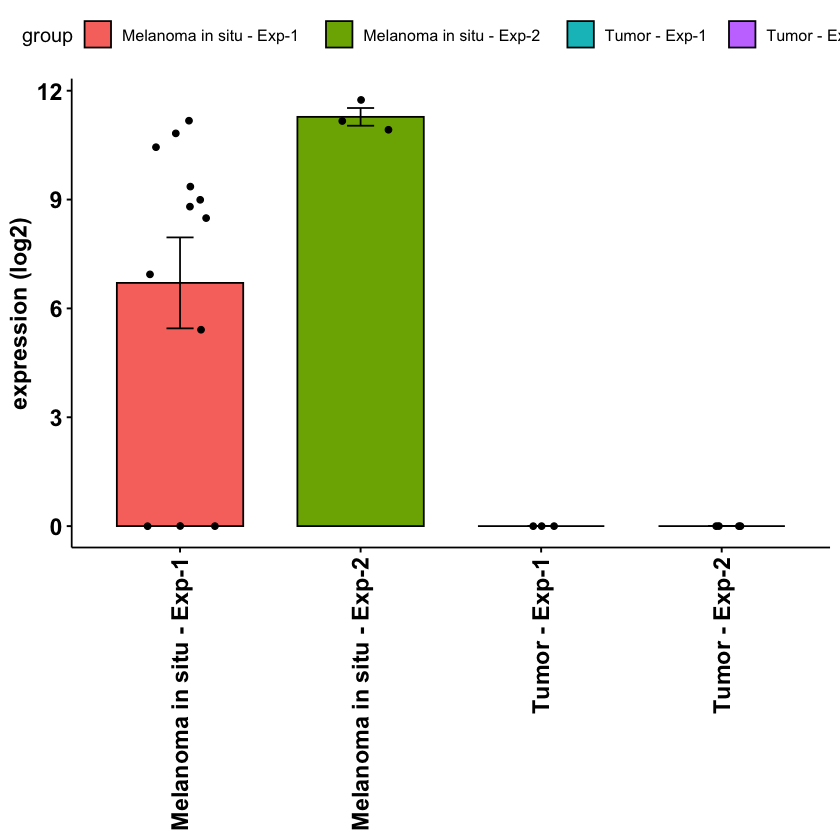

In [67]:
goi_collapsed_jitter (combined_ndata, combined_meta, goi='KRT14', intgroup='group')

Using group as id variables



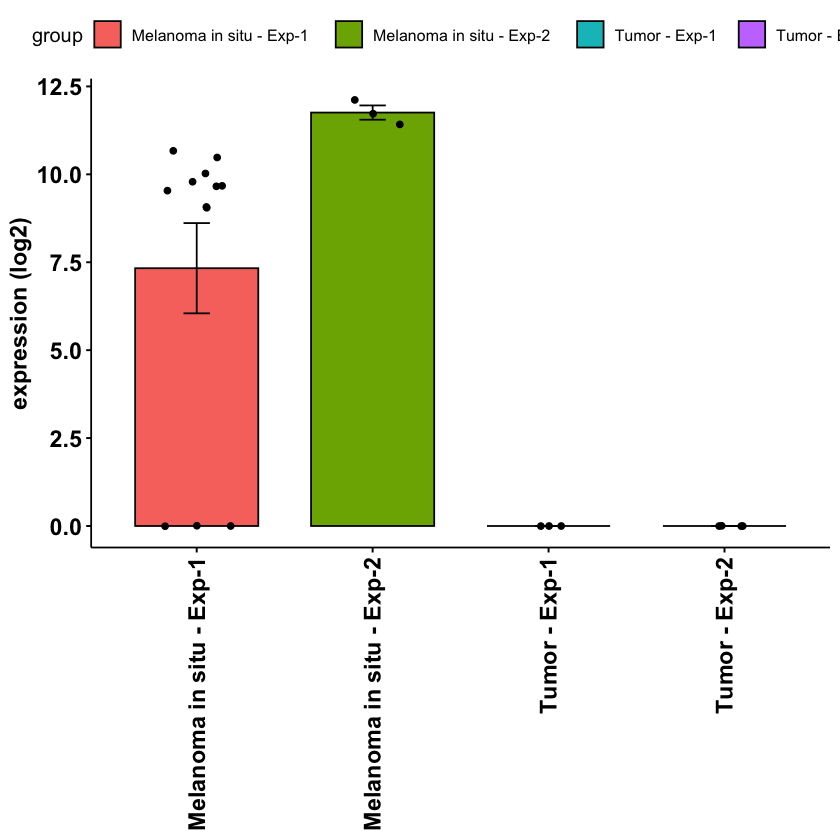

In [68]:
goi_collapsed_jitter (combined_ndata, combined_meta, goi='KRT5', intgroup='group')

Using group as id variables



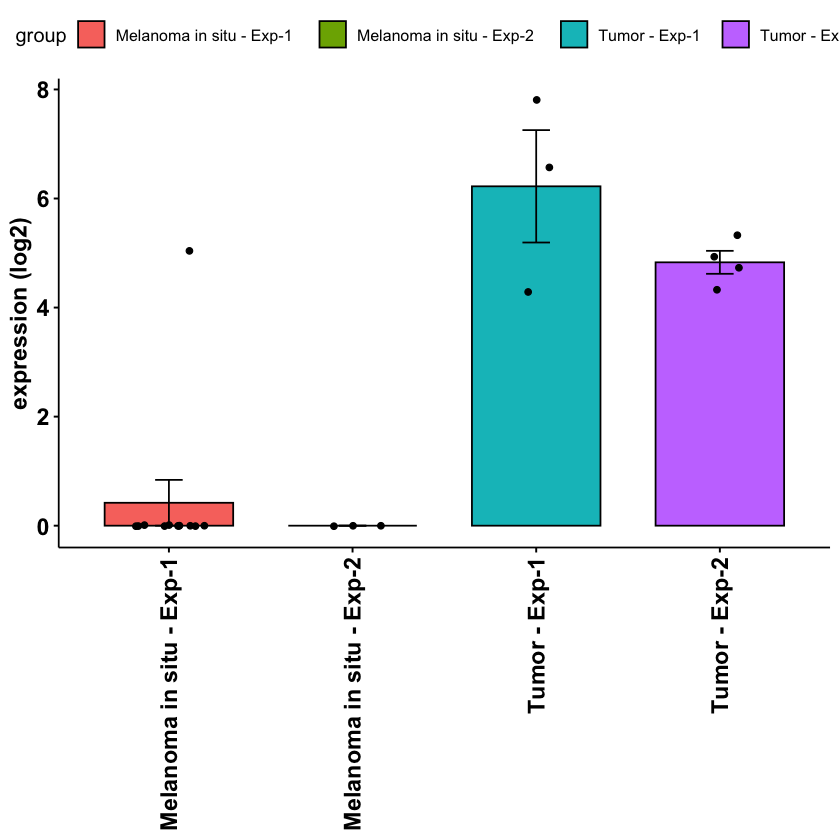

In [69]:
goi_collapsed_jitter (combined_ndata, combined_meta, goi='S100B', intgroup='group')

Using group as id variables



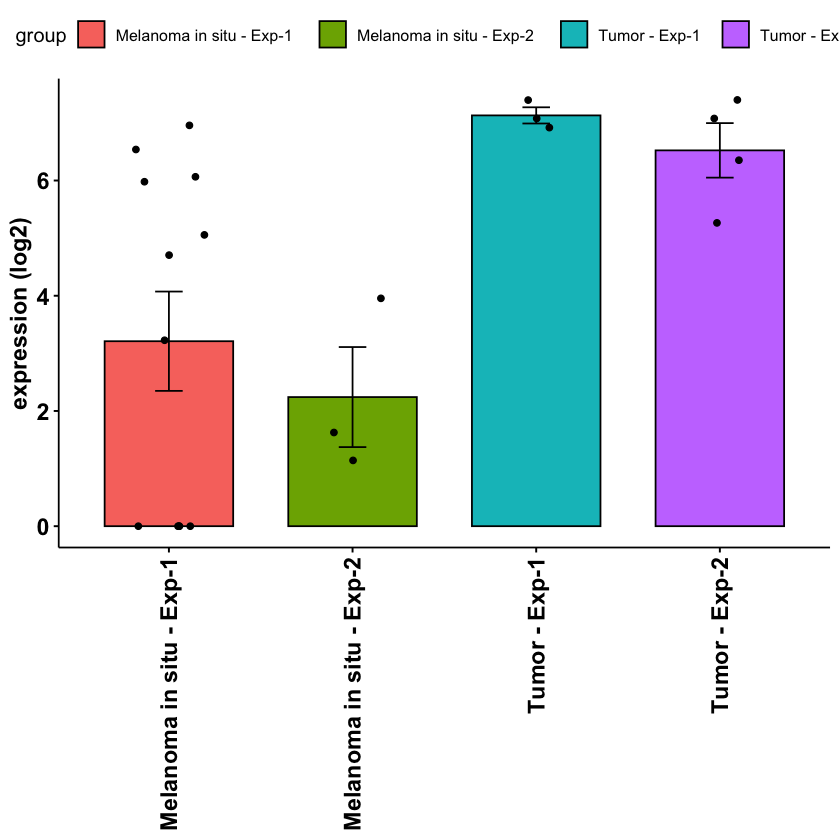

In [70]:
goi_collapsed_jitter (combined_ndata, combined_meta, goi='CD63', intgroup='group')

#### Comparison to geomx

In [72]:
# Subset pickseq and DSP data
common_genes <- intersect(row.names(melanoma_ndata),row.names(geomx_ndata))
pseq_exp <- melanoma_ndata[common_genes,]
dsp_exp <- geomx_ndata[common_genes,]

In [74]:
# Aggregate the ROI's for calculating gene-gene correlation
pseq_exp_t <- data.frame(t(pseq_exp))
pseq_meta_t <- data.frame(melanoma_meta[,'group_dsp_1',drop=F])
pseq_cor <- merge(pseq_exp_t, pseq_meta_t, by="row.names")
row.names(pseq_cor) <- pseq_cor[,1]
pseq_cor <- pseq_cor[,-1]
pseq_cor=aggregate(.~group_dsp_1, data=pseq_cor, mean) # collapse
row.names(pseq_cor) = pseq_cor[,1]
pseq_cor <- pseq_cor[,-1]
pseq_cor <- data.frame(t(pseq_cor))
# DSP
dsp_exp_t <- data.frame(t(dsp_exp))
dsp_meta_t <- data.frame(geomx_meta[,'group_dsp_1',drop=F])
dsp_cor <- merge(dsp_exp_t, dsp_meta_t, by="row.names")
row.names(dsp_cor) <- dsp_cor[,1]
dsp_cor <- dsp_cor[,-1]
dsp_cor=aggregate(.~group_dsp_1, data=dsp_cor, mean) # collapse
row.names(dsp_cor) = dsp_cor[,1]
dsp_cor <- dsp_cor[,-1]
dsp_cor <- data.frame(t(dsp_cor))
# Transpose the dataframes
p_cor <- data.frame(t(pseq_cor))
d_cor <- data.frame(t(dsp_cor))
# Loop to get all correlation values
cor_df <- data.frame()
for (i in colnames(p_cor)){
  corrr = cor.test(p_cor[,i], d_cor[,i], method="pearson")
  c_val = corrr$estimate
  p_val = -log10(corrr$p.value)
  cp = data.frame(c_val,p_val)
  row.names(cp) = i
  cor_df <- rbind(cor_df, cp)
}
# order based on P value
p_val_order <- cor_df[order(-cor_df$p_val),]
p_val_order$order <- seq(1: nrow(p_val_order))
# scale data
pseq_exp_scaled = data.frame(t(scale(t(pseq_exp))))
dsp_exp_scaled = data.frame(t(scale(t(dsp_exp))))
row.names(p_val_order) <- gsub("-", ".", row.names(p_val_order), fixed=TRUE)
row.names(pseq_exp_scaled) <- gsub("-", ".", row.names(pseq_exp_scaled), fixed=TRUE)
p_val_order <- merge(pseq_exp_scaled, p_val_order, by='row.names')
#Set Column annotation
ann_pseq <- data.frame(as.character(melanoma_meta$group_dsp_1))
colnames(ann_pseq) <- c('ROI')
ann_dsp <- data.frame(as.character(geomx_meta$group_dsp_1))
colnames(ann_dsp) <- c('ROI')
ann_cols <- brewer.pal(length(unique(ann_pseq[,1])),"Dark2") #BrBG
names(ann_cols) <- unique(ann_pseq[,1])
ann_cols <- list(ROI = ann_cols)
# Set the col annotation
col_pseq_Ann <- HeatmapAnnotation(df=ann_pseq, col=ann_cols, annotation_width=unit(c(1, 4), "cm"), gap=unit(1, "mm"))
col_dsp_Ann <- HeatmapAnnotation(df=ann_dsp, col=ann_cols, annotation_width=unit(c(1, 4), "cm"), gap=unit(1, "mm"))
# Color of heatmap
h1_col = colorRamp2(c(-2, -1, 0, 1, 2), c("#4B6AAF",  '#55B0AE', "#F8F6B8","#F5A15B","#B11E4B"))
cor_col = colorRamp2(c(-1, -0.5, 0, 0.5, 1), c("#4B6AAF",  '#55B0AE', "#F8F6B8","#F5A15B","#B11E4B"))
# Row annotation
pheno_p = rowAnnotation(axis_reverse = anno_barplot(cor_df$p_val, 
                                                    border = F, 
                                                    gp = gpar(fill = 'pink'),
                                                    width = unit(6, "cm"),
                                                    name = "-log10 P val (Corr)",
                                                    axis_param = list(direction = "reverse")
))

gennames = rowAnnotation(link = anno_mark( at = which(cor_df$c_val > 0.95),
                                           labels = row.names(cor_df[cor_df$c_val > 0.95,]), 
                                           labels_gp = gpar(fontsize = 8), padding = unit(1, "mm")))

In [75]:
# Draw the comparision heatmap
h1 = Heatmap(as.matrix(dsp_exp_scaled), cluster_columns = FALSE,  col = h1_col, top_annotation=col_dsp_Ann,
             show_row_names = FALSE, left_annotation = pheno_p, column_names_gp = gpar(fontsize = 5),
             show_row_dend = FALSE, cluster_rows = T, name='z score',  show_column_names = FALSE)


h2 = Heatmap(as.matrix(pseq_exp_scaled) , cluster_columns = FALSE,  col = h1_col, top_annotation=col_pseq_Ann,
             show_row_names = FALSE, column_names_gp = gpar(fontsize = 5), name='z score', show_column_names = FALSE)

h3 = Heatmap(as.matrix(cor_df$c_val), col = cor_col, cluster_columns = FALSE, show_row_names = FALSE,
             width = unit(1, "cm"), right_annotation = gennames, name='z score', show_column_names = FALSE)

ht_list = h1+ h2+ h3

draw(ht_list) #15x8

Warning message:
“Heatmap/annotation names are duplicated: z score”
Warning message:
“Heatmap/annotation names are duplicated: z score, z score”


#### Comparision of differentially expressed genes between the geomx and pickseq data

In [ ]:
# MIS vs Tumor
setwd("/Users/aj/Dropbox (Partners HealthCare)/Data/melanoma_rarecyte/Figures for manuscript/data/melanoma/")
arseq (data = melanoma_data, meta = melanoma_meta, design = "group_minimal", dgea=T, qc=F, contrast = list(A = c("Tumor"), B= c("Melanoma in situ")))
setwd("/Users/aj/Dropbox (Partners HealthCare)/Data/melanoma_rarecyte/Figures for manuscript/data/geomx/")
arseq (data = geomx_data, meta = geomx_meta, design = "group", dgea=T, qc=F, contrast = list(A = c("Exophytic Melanoma"), B= c("Melanoma in situ")))

In [77]:
setwd("/Users/aj/Dropbox (Partners HealthCare)/Data/melanoma_rarecyte/Figures for manuscript/data/melanoma/")
PickSeq <- read.csv("ARSeq/Exophytic Melanoma vs Melanoma in situ_A/Differential expression/Exophytic Melanoma vs Melanoma in situ.csv", header = T, row.names = 1)
setwd("/Users/aj/Dropbox (Partners HealthCare)/Data/melanoma_rarecyte/Figures for manuscript/data/geomx/")
GeoMx <- read.csv("ARSeq/Exophytic Melanoma vs Melanoma in situ/Differential expression/Exophytic Melanoma vs Melanoma in situ.csv", header = T, row.names = 1)

In [ ]:
# Get the DEG's
PickSeq <- PickSeq[PickSeq$padj <= 0.05,]
PickSeq <- PickSeq[complete.cases(PickSeq), ]
GeoMx <- GeoMx[GeoMx$padj <= 0.05,]
GeoMx <- GeoMx[complete.cases(GeoMx), ]
venn.diagram(list(PickSeq = row.names(PickSeq), GeoMx = row.names(GeoMx)),fill = c("#F5A15B","#55B0AE"),imagetype = "png",
             alpha = c(0.7, 0.7), cex = 2, lty =2, filename = "MISvsExophytic.png")


#### FC direction between pickseq and GeoMx

In [81]:
setwd("/Users/aj/Dropbox (Partners HealthCare)/Data/melanoma_rarecyte/Figures for manuscript/data/melanoma/")
PickSeq <- read.csv("ARSeq/Exophytic Melanoma vs Melanoma in situ_A/Differential expression/Exophytic Melanoma vs Melanoma in situ.csv", header = T, row.names = 1)
setwd("/Users/aj/Dropbox (Partners HealthCare)/Data/melanoma_rarecyte/Figures for manuscript/data/geomx/")
GeoMx <- read.csv("ARSeq/Exophytic Melanoma vs Melanoma in situ/Differential expression/Exophytic Melanoma vs Melanoma in situ.csv", header = T, row.names = 1)
# Foldchange
fc <- merge(PickSeq,GeoMx, by="row.names", all=T)
fc <- fc[,c("Row.names","log2FoldChange.x","log2FoldChange.y")]
row.names(fc) <- fc[,1]
fc <- fc[,-1]
# DEG's
PickSeq <- PickSeq[PickSeq$padj <= 0.05,]
PickSeq <- PickSeq[complete.cases(PickSeq), ]
GeoMx <- GeoMx[GeoMx$padj <= 0.05,]
GeoMx <- GeoMx[complete.cases(GeoMx), ]
deg <- intersect(row.names(PickSeq), row.names(GeoMx))
# Add to fc
fc$deg <- ifelse(row.names(fc) %in% deg, 'DEG', 'Rest')
# Create a column to highlight direction
for (i in 1:nrow(fc)){
  if (is.na(sign(fc[i,1])) | is.na(sign(fc[i,2]))){fc$direction[i] = NA}
  else if (sign(fc[i,1]) == sign(fc[i,2])){fc$direction[i] = 'same direction'}
  else if (sign(fc[i,1]) != sign(fc[i,2])){fc$direction[i] = 'opposite direction'}
}
# Add Zero to NA
fc[is.na(fc)] <- 0
# Adding genes of interest
goi <- c('S100B', 'PMEL', 'SOX10', 'CCL17','CD14','CD163', 'CD68','ITK', 'LDHA', 'MTOR','STAT5B',
         'KRT10','KRT14','KRT5','KRT1','NOTCH3','S100A7','CCND2','LYZ','CXCL14','SERPINB5','PRKACB','EGFR','PLD1','IGF2R',
         'SPP1', 'CD63','MET','CDK2','MFGE8','MLPH','IGF1R','COL11A1','MIA','KRT10','S100A9','S100A8','SFN','JUP',
         'DUSP1', 'PKP3','DSC3','ID1','A2M','PRDX5','NECTIN1','KLF4','CEBPB')

In [83]:
# keep only elements with >1 fold change (to include opp direction genes)
opp = fc[fc$direction == 'opposite direction',]
opp = opp[opp$deg == 'DEG',]
opp_x = opp[opp$log2FoldChange.x > 1 | opp$log2FoldChange.x < -1,]
opp_x = opp_x[opp_x$log2FoldChange.y > 1 | opp_x$log2FoldChange.y < -1,]
goi <- c(goi, row.names(opp_x))

fc$goi <- ifelse(row.names(fc) %in% goi, row.names(fc), NA)

Warning message:
“Removed 17546 rows containing missing values (geom_text_repel).”


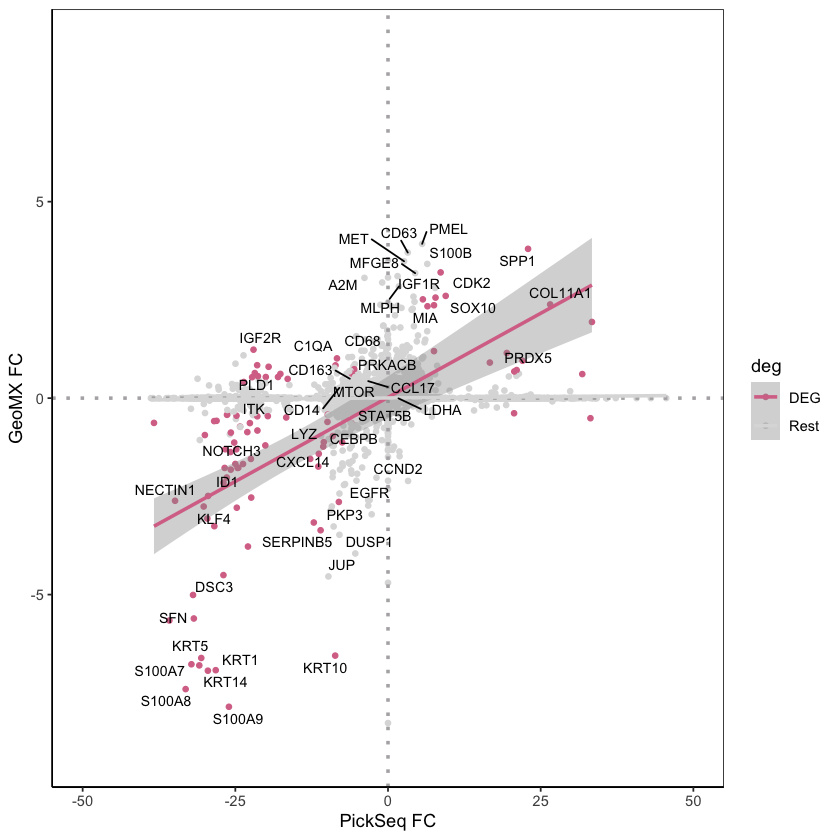

In [84]:
formula <- y ~ poly(x, 1, raw = TRUE)
ggplot(data=fc, aes(x=log2FoldChange.x, y=log2FoldChange.y, color=deg)) + 
  geom_point(size=1.2)+
  xlim(-50, 50) + ylim(-9, 9) + geom_hline(yintercept=0, size=1,linetype="dotted", color="#B2B1B2")+ 
  geom_vline(xintercept=0, size=1,linetype="dotted", color="#B2B1B2") + 
  theme_bw()+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        axis.line = element_line(size = 0.5, linetype = "solid",colour = "black"))+
  xlab("PickSeq FC") + ylab("GeoMX FC")+ scale_color_manual(values=c("#D77495", "#DCDCDC"))+
  geom_smooth(method = "lm", se = T, formula = formula)+
  ggrepel::geom_text_repel(data = fc, aes(label = goi),color='black', size=3)

In [ ]:
# number of genes in opposite direction
dim(fc[fc$direction == 'opposite direction',]) + dim(fc[fc$direction == 'same direction',])
dim(fc[fc$direction == 'same direction',])

### Functions

In [1]:
# PCA
arseq.pca.plot = function(dds, intgroup="arseq.group", ntop=500, pc.a= 1, pc.b = 2, returnData=FALSE,wes_palette="GrandBudapest1"){
  print("Performing PCA analysis")
  require(DESeq2)
  require(ggrepel)
  require(ggplot2)
  require(wesanderson)
  # Normalize data
  vsd <- varianceStabilizingTransformation(dds, blind = FALSE)
  # calculate the variance for each gene
  rv <- rowVars(vsd@assays@data[[1]])
  
  # select the ntop genes by variance
  select <- order(rv, decreasing=TRUE)[seq_len(min(ntop, length(rv)))]
  
  # perform a PCA on the data in assay(x) for the selected genes
  pca <- prcomp(t(vsd@assays@data[[1]][select,]))
  
  # the contribution to the total variance for each component
  percentVar <- pca$sdev^2 / sum( pca$sdev^2 )
  
  if (!all(intgroup %in% names(vsd@colData))) {
    stop("the argument 'intgroup' should specify columns of colData(dds)")
  }
  
  intgroup.df <- as.data.frame(vsd@colData[, intgroup, drop=FALSE])
  
  # add the intgroup factors together to create a new grouping factor
  group <- if (length(intgroup) > 1) {
    factor(apply( intgroup.df, 1, paste, collapse=":"))
  } else {
    vsd@colData[[intgroup]]
  }
  
  # assembly the data for the plot
  d <- data.frame(pca$x[,pc.a], pca$x[,pc.b], group=group, intgroup.df, name=colnames(vsd))
  names(d)[1] <- paste("PC",pc.a,sep = "")
  names(d)[2] <- paste("PC",pc.b,sep = "")
  
  
  if (returnData) {
    attr(d, "percentVar") <- percentVar[pc.a:pc.b]
    return(d)
  }
  
  ggplot(data=d, aes_string(x=paste("PC",pc.a,sep = ""), y=paste("PC",pc.b,sep = ""), color="group")) + geom_point(size=5) +
    xlab(paste0(paste("PC",pc.a,sep = ""),": ",round(percentVar[pc.a] * 100),"% variance")) +
    ylab(paste0(paste("PC",pc.b,sep = ""),": ",round(percentVar[pc.b] * 100),"% variance")) +
    theme_classic()+
    theme(plot.title = element_text(hjust = 0.5),
          axis.text.x = element_text(face="bold", color="#1a1a1b", 
                                     size=14),
          axis.text.y = element_text(face="bold", color="#1a1a1b", 
                                     size=14)) +
    scale_color_manual(values=wes_palette(n= 5, name=wes_palette))+
    geom_text_repel(aes(label = .data$name),size = 5) +
    coord_fixed() + ggtitle("Principal component analysis (PCA) Plot")+
    theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")
}

In [47]:
# Gene of interest bar plots
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,conf.interval=.95, .drop=TRUE) {
  library(plyr)
  
  # New version of length which can handle NA's: if na.rm==T, don't count them
  length2 <- function (x, na.rm=FALSE) {
    if (na.rm) sum(!is.na(x))
    else       length(x)
  }
  
  # This does the summary. For each group's data frame, return a vector with
  # N, mean, and sd
  datac <- ddply(data, groupvars, .drop=.drop,
                 .fun = function(xx, col) {
                   c(N    = length2(xx[[col]], na.rm=na.rm),
                     mean = mean   (xx[[col]], na.rm=na.rm),
                     sd   = sd     (xx[[col]], na.rm=na.rm)
                   )
                 },
                 measurevar
  )
  
  # Rename the "mean" column
  #datac <- rename(datac, c("mean" = measurevar))
  #colnames(datac[,"mean"]) <- measurevar
  names(datac)[names(datac) == 'mean'] <- measurevar
  
  datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean
  
  # Confidence interval multiplier for standard error
  # Calculate t-statistic for confidence interval:
  # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
  ciMult <- qt(conf.interval/2 + .5, datac$N-1)
  datac$ci <- datac$se * ciMult
  
  return(datac)
}
goi_collapsed <- function(data,meta,goi,intgroup, groups=NULL,palette='Dark2'){
  require(ggplot2)
  require(reshape2)
  
  # gene of interest
  d <- data [goi,,drop=FALSE]
  d <- merge(t(d), meta, by = "row.names")
  
  # Identify the samples of interest
  columns_to_keep <- c(goi, intgroup)
  if (is.null(groups)){
    groups = unique(d[,intgroup])
  }
  d <- d[d[,intgroup] %in% unlist(groups) , colnames(d) %in% columns_to_keep,drop=FALSE]
  
  # Aggregate values
  d[, intgroup] <- as.factor(d[, intgroup])
  d <- melt(d)
  # Calculate SE
  d = summarySE(d, measurevar="value", groupvars=c(intgroup,"variable"))
  
  # plot
  ggplot(d, aes(x=d[,intgroup],y=value,fill=d[,intgroup]))+ geom_bar(stat="identity")+
    theme_classic()+
    geom_errorbar(aes(ymin=value-se, ymax=value+se),width=.2) +
    ggtitle(goi)+ theme(plot.title = element_text(hjust = 0.5))+
    theme(plot.title = element_text(hjust = 0.5),axis.title.x = element_blank(),
          axis.text.x = element_text(face="bold", color="#000000", 
                                     size=14),
          axis.text.y = element_text(face="bold", color="#000000", 
                                     size=14))+
    scale_fill_brewer(palette=palette)+
    #scale_fill_brewer(palette="PuBuGn")+
    theme(legend.position="none", axis.text.x = element_text(angle = 75, hjust = 1,face = "bold",size = 10))
  
}
goi_collapsed_jitter <- function(data,meta,goi,intgroup, groups=NULL){
  require(ggplot2)
  require(reshape2)
  require(ggpubr)
  
  # gene of interest
  d <- data [goi,,drop=FALSE]
  d <- merge(t(d), meta, by = "row.names")
  
  # Identify the samples of interest
  columns_to_keep <- c(goi, intgroup)
  if (is.null(groups)){
    groups = unique(d[,intgroup])
  }
  d <- d[d[,intgroup] %in% unlist(groups) , colnames(d) %in% columns_to_keep,drop=FALSE]
  
  # Aggregate values
  d[, intgroup] <- as.factor(d[, intgroup])
  d <- melt(d)

  # use ggpubr
  ggbarplot(d, x = intgroup, y = "value", add = c("mean_se", "jitter"),fill = intgroup)+
    theme(plot.title = element_text(hjust = 0.5),axis.title.x = element_blank(),
          axis.text.x = element_text(face="bold", color="#000000", size=14),
          axis.text.y = element_text(face="bold", color="#000000", size=14),
          axis.title.y = element_text(face="bold", color="#000000", size=14))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    ylab("expression (log2)")
  
}
average_goi_plot <- function(data, meta, goi, intgroup, groups){
  require(ggplot2)
  require(reshape2)
  # gene of interest
  d <- data [goi,,drop=FALSE]
  d <- merge(t(d), meta, by = "row.names")
  
  # Identify the samples of interest
  columns_to_keep <- c(goi, intgroup)
  d <- d[d[,intgroup] %in% unlist(groups) , colnames(d) %in% columns_to_keep,drop=FALSE]
  d$grouping <- ifelse(d[,intgroup] %in% groups$A, "Group_A", "Group_B")
  d <- d[ , -which(names(d) %in% c(intgroup))]
  # Aggregate values
  d$grouping <- as.factor(d$grouping)
  d <- melt(d)
  # Convert Group_B to negative
  d$value_m <- ifelse(d$grouping == "Group_B", d$value * -1, d$value)
  # Calculate SE
  d = summarySE(d, measurevar="value_m", groupvars=c("grouping","variable"))
  
  # Maintain order
  #Turn your 'treatment' column into a character vector
  d$variable <- as.character(d$variable)
  #Then turn it back into a factor with the levels in the correct order
  d$variable <- factor(d$variable, levels=unique(d$variable))
  
  #d=aggregate(.~grouping, data=d, mean)
  #rownames(d)=d[,1]
  #d=d[,-1]
  # Convert second row to negative values
  #d[2,2:ncol(d)] <- d[2,2:ncol(d)]* -1
  
  # Plot
  g1_legend = do.call(paste, c(as.list(groups[[1]]), sep = " + "))
  g2_legend = do.call(paste, c(as.list(groups[[2]]), sep = " + "))
  ggplot(d, aes(x=variable, y=value_m, fill=grouping)) +
    geom_bar(stat="identity", position="identity")  + ylab("log2 expression") + coord_flip() +
    geom_errorbar(aes(ymin=value_m-se, ymax=value_m+se),width=.2) +
    theme(plot.title = element_text(hjust = 0.5),axis.title.x = element_blank(),
          axis.text.x = element_text(face="bold", color="#000000", 
                                     size=14),
          axis.text.y = element_text(face="bold", color="#000000", 
                                     size=14))+
    geom_hline(yintercept = 0) + theme(panel.grid = element_blank()) +
    xlab ("") + scale_y_continuous( labels=function(x)abs(x) ) +
    scale_fill_manual(values=c("#E69F00", "#56B4E9"),
                      name="ROI's", labels=c(g1_legend, g2_legend))
}

In [3]:
# ssGSEA analysis 
ssgsea_analysis <- function(data,signature,meta=NULL,intgroup=NULL, custom_color=NULL, show_column_names=F, padding = unit(c(2, 2, 2, 60), "mm")){
  
  # load required libraries
  require(GSEABase)
  require(GSVA)
  require(circlize)
  require(ComplexHeatmap)
  require(RColorBrewer)
  
  # Make a copy of the group type
  group <- signature[,1,drop=FALSE]
  colnames(group) <- c('cluster')
  # Drop the groups from signature
  signature <- signature[,-1]
  # transpose the signature
  signature <- data.frame(t(signature))
  
  # Convert signature into a named list
  named_list <- function(df){
    final_list <- c()
    for (i in 1: ncol(df)){
      tmp <- as.character(df[,i])
      tmp <- list(tmp[nchar(tmp) > 1])
      names(tmp) <- colnames(df[,i,drop=F])
      final_list <- c(final_list, tmp)
    }
    return(final_list)
  }
  x = named_list (signature)
  
  # Run the enrichment
  gbm_es <- gsva(as.matrix(data), x,method='ssgsea',ssgsea.norm=T)
  
  # Viz using heatmap with metadata
  ssgsea_scaled = t(scale(t(gbm_es)))
  #h1_col = colorRamp2(c(-1, -0.5, 0, 0.5, 1), c("#4B6AAF",  '#55B0AE', "#F8F6B8","#F5A15B","#B11E4B"))
  h1_col = colorRamp2(c(-1, 0, 1), c("#F8F6B8","#F5A15B","#B11E4B"))
  #h1_col = colorRamp2(c(-1, -0.5, 0, 0.5, 1), c("#f2e9e4",  '#c9ada7', "#9a8c98","#4a4e69","#22223b"))
  #h1_col = colorRamp2(c(-1, -0.5, 0, 0.5, 1), c("#e0e1dd",  '#778da9', "#415a77","#1b263b","#0d1b2a"))
  #h1_col = colorRamp2(c(-1, -0.5, 0, 0.5, 1), c("#f8f9fa",  '#dee2e6', "#ced4da","#6c757d","#343a40"))
  
  # converge grouping with ssgsea
  group <- group[row.names(group) %in% row.names(gbm_es), , drop = FALSE]
  
  if(!is.null(meta)){
    # Add column annotation (Sample group)
    col_ann <- data.frame(as.character(meta[,intgroup]))
    colnames(col_ann) <- c('Groups')
    # Create color pallete
    colourCount <- length(unique(col_ann[,1]))
    getPalette <- colorRampPalette(brewer.pal(8, "Dark2"))
    col_color <- getPalette(colourCount)
    if (!is.null(custom_color)){col_color <- custom_color}
    names(col_color) <- unique(col_ann[,1])
    col_color <- list(Groups = col_color)
    col_Ann <- HeatmapAnnotation(df=col_ann, col=col_color, annotation_width=unit(c(1, 4), "cm"), gap=unit(1, "mm"))
  }
  
  # Heatmap
  if(is.null(meta)){
    h1 <- Heatmap(as.matrix(ssgsea_scaled), col = h1_col, border=T, cluster_columns = F,  
                  rect_gp = gpar(col = "#22223b", lwd = 1), show_column_names = show_column_names,
                  row_names_gp = gpar(fontsize = 12), cluster_rows = T,
                  row_split = factor(group$cluster, levels = unique(group$cluster)),
                  show_row_names = TRUE, name='ssGSEA score')
    draw(h1, heatmap_legend_side = "left", annotation_legend_side = "left", padding = padding)
    
  } else {
    h1 <- Heatmap(as.matrix(ssgsea_scaled), col = h1_col, border=T, cluster_columns = F,  
                  rect_gp = gpar(col = "#22223b", lwd = 1), show_column_names = show_column_names,
                  row_names_gp = gpar(fontsize = 12), cluster_rows = T, top_annotation=col_Ann,
                  row_split = factor(group$cluster, levels = unique(group$cluster)),
                  show_row_names = TRUE, name='ssGSEA score')
    draw(h1, heatmap_legend_side = "left", annotation_legend_side = "left", padding = padding)
    
  }
  
}

In [4]:
# Volcano plot
arseq.volcano.plot <- function(deg,selectLab,pCutoff=0.05,FCcutoff=3,colCustom=keyvals){
  print("Generating a volcano plot between the constrast groups")
  require(EnhancedVolcano)
  deg.volcano <- data.frame(deg)[complete.cases(data.frame(deg)),]
  EnhancedVolcano(deg.volcano,
                  lab = rownames(deg.volcano),
                  selectLab=selectLab,
                  x = 'log2FoldChange',
                  y = 'padj',
                  xlab = bquote(~Log[2]~ 'fold change'),
                  ylab = bquote(~-Log[10]~adjusted~italic(P)),
                  colCustom = colCustom,
                  pCutoff = pCutoff,
                  FCcutoff = FCcutoff,
                  gridlines.minor = FALSE,
                  gridlines.major = FALSE,
                  border = 'full',
                  labSize = 4.0,
                  pointSize = 1.0,
                  colAlpha = 1,
                  legend=c('NS','3 Log2 FC','Adj P-value (<0.005)',
                           'Adj P-value (<0.005) & 3 Log2 FC'),
                  legendPosition = 'right',
                  drawConnectors = TRUE,
                  widthConnectors = 0.2,
                  colConnectors = 'grey30',
                  legendIconSize = 3.0)
}


In [88]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] plyr_1.8.6                  EnhancedVolcano_1.4.0      
 [3] ReactomePA_1.30.0           RColorBrewer_1.1-2         
 [5] ComplexHeatmap_2.5.2        circlize_0.4.9             
 [7] GSVA_1.34.0                 GSEABase_1.48.0            
 [9] graph_1.64.0                annotate_1.64.0            
[11] XML_3.99-0.3                ggpubr_0.3.0.999           
[13] reshape2_1.4.3              ggrepel_0.8.1              
[15] DESeq2_1.26.0             